In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")
%matplotlib inline

data = pd.read_csv('CSV_files/wine_quality.csv')

print("Dataset Shape:", data.shape)

Dataset Shape: (1143, 13)


In [20]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


C:\Users\Ken\AppData\Local\Temp\ipykernel_15396\4244455154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis', legend=False)


<Figure size 800x500 with 0 Axes>

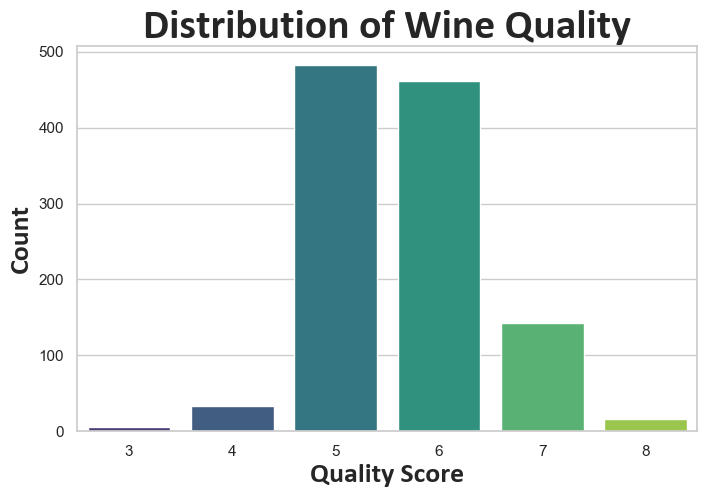

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data, palette='viridis', legend=False)
plt.title('Distribution of Wine Quality', fontdict={'fontname': 'Calibri' , 'fontsize':30, 'fontweight':'bold'})
plt.xlabel('Quality Score',fontdict={'fontname': 'Calibri' , 'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Count',fontdict={'fontname': 'Calibri' , 'fontsize':20, 'fontweight':'bold'})
plt.savefig('quality count graph.png', dpi=300)
plt.show()

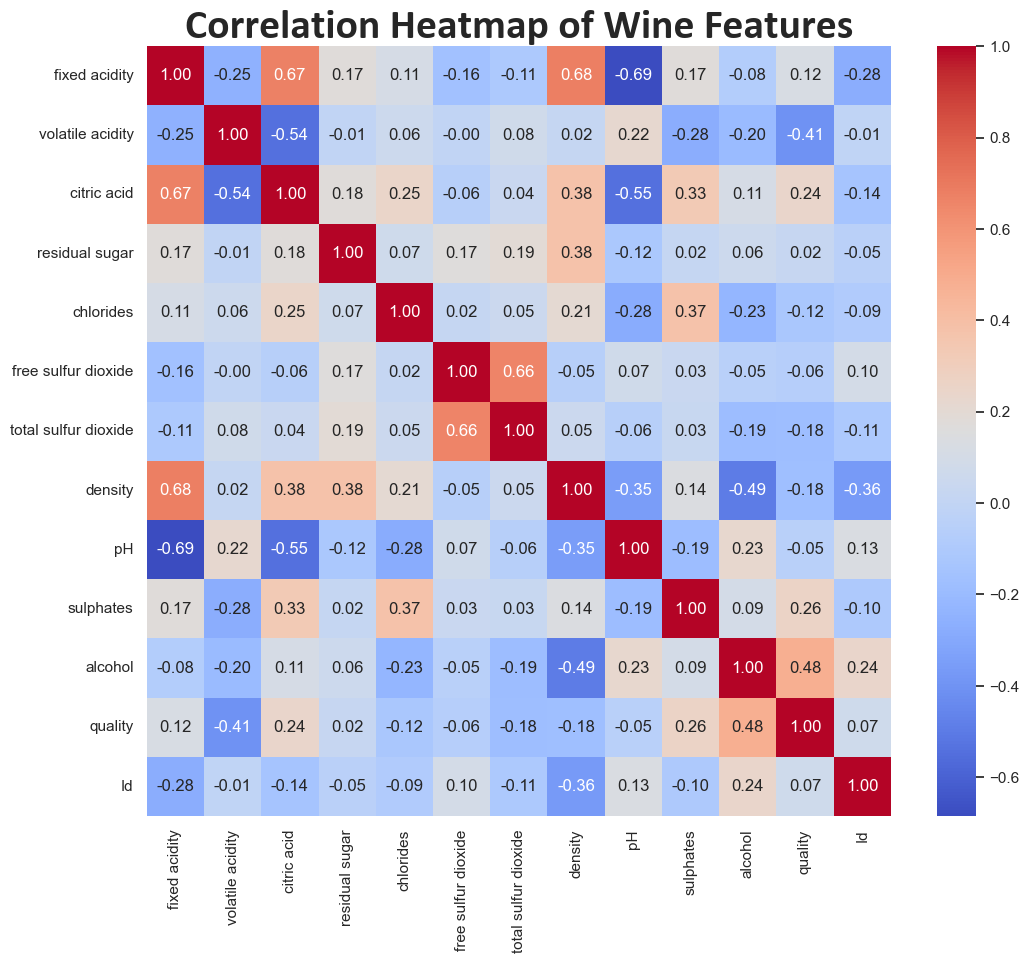

In [45]:
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Features', fontdict={'fontname': 'Calibri' , 'fontsize':30, 'fontweight':'bold'})
plt.savefig('Correlation Heatmap of Wine Features', dpi=300)
plt.show()

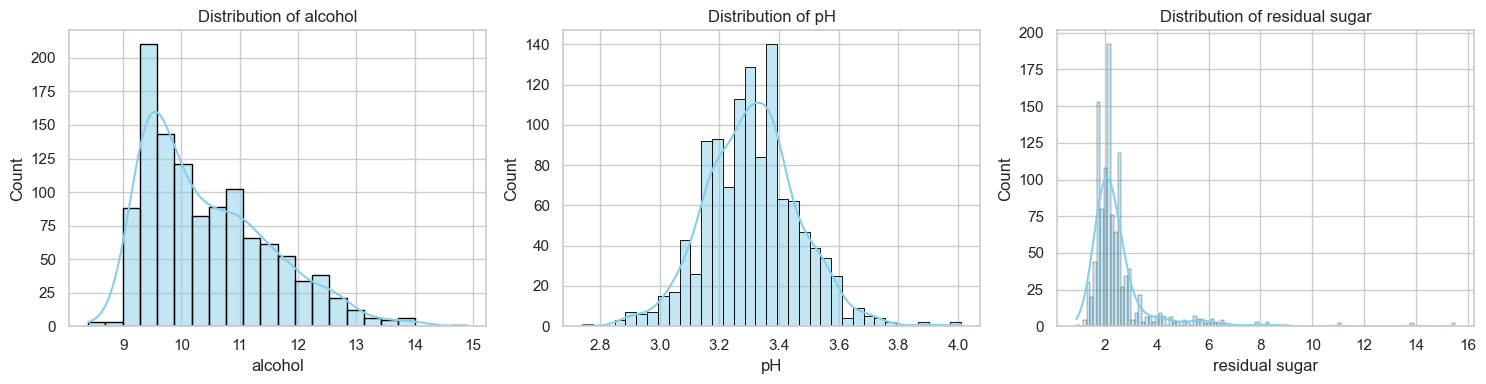

In [59]:
features = ['alcohol', 'pH', 'residual sugar']
plt.figure(figsize=(15, 4))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[feature], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.savefig('distribution of some figs', dpi = 300)
plt.show()

In [60]:
data['good_wine'] = np.where(data['quality'] >= 7, 1, 0)
print(data['good_wine'].value_counts())

good_wine
0    984
1    159
Name: count, dtype: int64


In [62]:
data = data.drop('quality', axis=1)

In [80]:
X = data.drop('good_wine', axis=1)
y = data['good_wine']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [104]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.8952

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       201
           1       0.58      0.54      0.56        28

    accuracy                           0.90       229
   macro avg       0.76      0.74      0.75       229
weighted avg       0.89      0.90      0.89       229



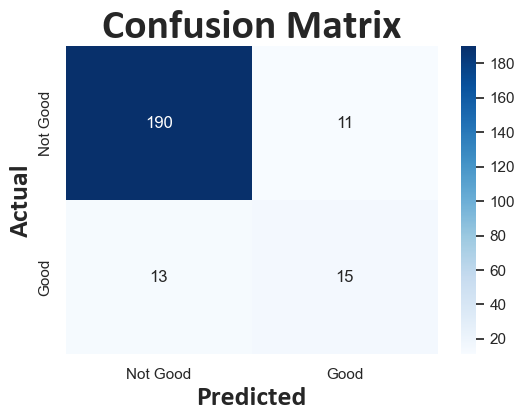

In [107]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Good', 'Good'], yticklabels=['Not Good', 'Good'])
plt.xlabel('Predicted', fontdict={'fontname': 'Calibri' , 'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Actual', fontdict={'fontname': 'Calibri' , 'fontsize':20, 'fontweight':'bold'})
plt.title('Confusion Matrix', fontdict={'fontname': 'Calibri' , 'fontsize':30, 'fontweight':'bold'})
plt.savefig('confusion martix.png', dpi=300)
plt.show()